# Journal 2022-08-19
Trying a new approach to capturing things I see each day, and adhoc code.

## Links
Closing some open tabs 

* [Quantitative Economics with Python](https://python.quantecon.org/intro.html) via [twitter](https://twitter.com/QuantEcon/status/1560170065248534528)
  * [Notebooks](https://github.com/QuantEcon/lecture-python.notebooks)
* [JuPyText](https://towardsdatascience.com/introducing-jupytext-9234fdff6c57) "a Jupyter plugin that reads and writes notebooks as plain text files: either Julia, Python, R scripts, Markdown, or R Markdown documents."
* [ArXiv API](https://arxiv.org/help/api/user-manual)
* [Papers With Code API](https://paperswithcode.com/api/v1/docs/)
* [RAX - composable learning to rank with JAX](https://ai.googleblog.com/2022/08/rax-composable-learning-to-rank-using.html)
* [Bayesian Methods for Hackers](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers)
* [Hierachical Linear Regression with PyMC3](https://twiecki.io/blog/2014/03/17/bayesian-glms-3/) 
* [PyMC4 Release Announcement](https://www.pymc.io/blog/v4_announcement.html)
* [Topological Data Analysis and Beyond (workshop at NeurIPS 2020)](https://tda-in-ml.github.io/papers)
* [UvA Deep Learning Notebooks - JAX](https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/JAX/tutorial2/Introduction_to_JAX.html)
* [SymPy medium posts by MathCube](https://medium.com/@mathcube7/list/sympy-computer-algebra-with-python-c067d2b66030)
* [Group Explorer 3.0](https://nathancarter.github.io/group-explorer/index.html)
* [AWS Causal Modelling - DoWhy](https://www.amazon.science/blog/aws-contributes-novel-causal-machine-learning-algorithms-to-dowhy)
* [PyScript - run python in HTML via WASM](https://pyscript.net/)
* [Nutshell - expandable explanations](https://ncase.me/nutshell/) - haven't got this working in Jupyter yet

Transformers, Diffusion models
* [The Annotated GPT-2](https://amaarora.github.io/2020/02/18/annotatedGPT2.html)
* [The Annotated Transformer](http://nlp.seas.harvard.edu/2018/04/03/attention.html)
* [The Annotated Diffusion Model](https://huggingface.co/blog/annotated-diffusion)
* [Build a Transformer from Scratch in JAX](https://theaisummer.com/jax-transformer/)
* [How Attention Works in Deep Learning](https://theaisummer.com/attention/)
* [How Transformers Work in Deep Learning](https://theaisummer.com/transformer/)


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import yfinance as yf
from functools import reduce

# Financial Data
Looking at some market price trends using yfinance and some bespoke analaysis code.

In [3]:
from market_data import Index, ISHARES_US_SECTOR_ETFS, INDEXES

In [4]:
INDEXES

{'FTSE 100': 'ftse-100',
 'FTSE 250': 'ftse-250',
 'FTSE 350': 'ftse-350',
 'FTSE All Share': 'ftse-all-share',
 'FTSE AIM UK 50 Index': 'ftse-aim-uk-50-index',
 'FTSE AIM UK 100 Index': 'ftse-aim-uk-100-index',
 'FTSE AIM All Share': 'ftse-aim-all-share'}

In [5]:
print(', '.join(ISHARES_US_SECTOR_ETFS))

IUIT, IUHC, IUFS, IUES, IUCD, IUCS, IUUS, IUIS, IUMS, IUCM


A couple of ETFs that might benefit from efforts to combat climate change, e.g. the Inflation Reduction Act.
* ECAR - iShares Electric Vehicles and Driving Technology UCITS ETF
* INRG - iShares Global Clean Energy UCITS ETF USD (Dist)


In [6]:
ecar = yf.Ticker('ECAR.L')

In [7]:
pd.DataFrame(ecar.info['holdings'])

,symbol,holdingName,holdingPercent
0,NVDA,NVIDIA Corp,0.0261
1,006400.KS,Samsung SDI Co Ltd,0.0258
2,TSLA,Tesla Inc,0.0254
3,01211,BYD Co Ltd Class H,0.0249
4,MARUTI.BO,Maruti Suzuki India Ltd,0.0234
5,GRMN,Garmin Ltd,0.0231
6,APTV,Aptiv PLC,0.0230
7,ETN,Eaton Corp PLC,0.0230
8,012330.KS,Hyundai Mobis Co Ltd,0.0230
9,HEXA B,Hexagon AB Class B,0.0229


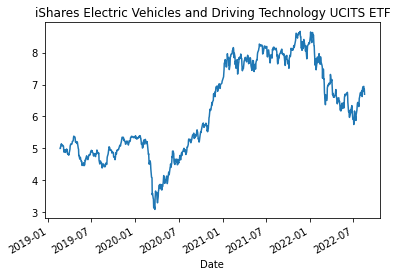

In [8]:
_ = ecar.history(start='2019-01-01')['Close'].plot(title=ecar.info['longName'])

In [9]:
inrg = yf.Ticker('INRG.L')
print(inrg.info['longName'])

iShares Global Clean Energy UCITS ETF USD (Dist)


In [10]:
pd.DataFrame(inrg.info['holdings'])

,symbol,holdingName,holdingPercent
0,VWS,Vestas Wind Systems A/S,0.0793
1,ENPH,Enphase Energy Inc,0.0663
2,ORSTED,Orsted A/S,0.0583
3,PLUG,Plug Power Inc,0.0481
4,XEL,Xcel Energy Inc,0.0414
5,NEE,NextEra Energy Inc,0.0405
6,SEDG,SolarEdge Technologies Inc,0.0399
7,IBE.BC,Iberdrola SA,0.0395
8,ENEL.MI,Enel SpA,0.0389
9,SSE.L,SSE PLC,0.0304


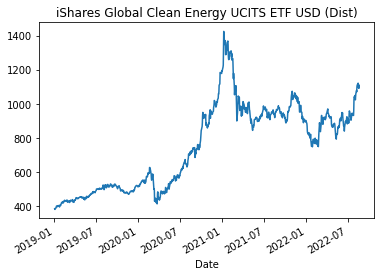

In [11]:
_ = inrg.history(start='2019-01-01')['Close'].plot(title=inrg.info['longName'])

# Sector Performance
Look at the performance of some iShares ETFs that track US sectors. 

Start by using Yahoo Finance to get the metadata about each ETF, this takes a few seconds but the results are then cached.

In [12]:
sectors = {
    t: yf.Ticker(t + '.L').info for t in ISHARES_US_SECTOR_ETFS
}

Get the exposures of each sector ETF to the sectors.  Label the ETF with the sector it is most exposed to, typically the main sector weightings are > 95%, apart from IT (some financial services and industrials) and basic materials (some consumer cyclical and industrials)

In [13]:
df_exposures = pd.DataFrame.from_dict(
    {t: pd.DataFrame(sectors[t]['sectorWeightings']).sum() for t in sectors}, orient='index'
)
df_exposures.T

,IUIT,IUHC,IUFS,IUES,IUCD,IUCS,IUUS,IUIS,IUMS,IUCM
realestate,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
consumer_cyclical,0.0000,0.0000,0.0000,0.000,0.9465,0.0000,0.0,0.0132,0.1040,0.0000
basic_materials,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0,0.0000,0.8751,0.0000
consumer_defensive,0.0000,0.0000,0.0000,0.000,0.0443,0.9814,0.0,0.0000,0.0000,0.0000
technology,0.8932,0.0000,0.0000,0.000,0.0037,0.0000,0.0,0.0138,0.0000,0.0000
communication_services,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0,0.0000,0.0000,0.9971
financial_services,0.0809,0.0000,0.9949,0.000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
utilities,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,1.0,0.0000,0.0000,0.0000
industrials,0.0239,0.0000,0.0000,0.000,0.0036,0.0000,0.0,0.9699,0.0176,0.0000
energy,0.0000,0.0000,0.0000,0.998,0.0000,0.0000,0.0,0.0000,0.0000,0.0000


In [14]:
sector_names = dict(zip(
    df_exposures.index, 
    df_exposures.columns[
        df_exposures.apply(lambda x: np.argmax(x.values), axis=1)
    ].str.replace('_', ' ').str.title()
))
sector_names

{'IUIT': 'Technology',
 'IUHC': 'Healthcare',
 'IUFS': 'Financial Services',
 'IUES': 'Energy',
 'IUCD': 'Consumer Cyclical',
 'IUCS': 'Consumer Defensive',
 'IUUS': 'Utilities',
 'IUIS': 'Industrials',
 'IUMS': 'Basic Materials',
 'IUCM': 'Communication Services'}

Next retrieve the historical daily prices from Yahoo Finance 

In [15]:
df_s_p = yf.download([t['symbol'] for t in sectors.values()])

[*********************100%***********************]  10 of 10 completed


By default we return the full history available - it looks like some sector ETFs became avaiable after the others, and we only have data from all sectors from September 2018.

In [16]:
df_s_p.loc[:, 'Adj Close'].head()

,IUCD.L,IUCM.L,IUCS.L,IUES.L,IUFS.L,IUHC.L,IUIS.L,IUIT.L,IUMS.L,IUUS.L
Date,,,,,,,,,,
2015-11-20,5.06539,NaN,NaN,4.88572,5.01332,4.9573,NaN,5.06000,NaN,NaN
2015-11-23,5.08300,NaN,NaN,4.91800,4.99410,4.9700,NaN,5.03830,NaN,NaN
2015-11-24,5.05375,NaN,NaN,5.00875,4.95350,4.9300,NaN,5.01875,NaN,NaN
2015-11-25,5.09125,NaN,NaN,5.02125,4.97850,4.9800,NaN,5.02625,NaN,NaN
2015-11-26,5.12125,NaN,NaN,4.99050,5.00325,5.0065,NaN,5.04375,NaN,NaN


In [17]:
df_s_p.loc[:, 'Adj Close'].dropna().head()

,IUCD.L,IUCM.L,IUCS.L,IUES.L,IUFS.L,IUHC.L,IUIS.L,IUIT.L,IUMS.L,IUUS.L
Date,,,,,,,,,,
2018-09-17,7.48,4.9500,5.12,5.86,7.35,6.72,6.02000,9.12,5.80375,5.46375
2018-09-18,7.53,4.9900,5.11,5.88,7.37,6.75,6.04000,9.17,5.81000,5.46375
2018-09-19,7.53,5.0355,5.11,5.89,7.49,6.75,6.07125,9.11,5.87000,5.40000
2018-09-20,7.58,5.0355,5.15,5.88,7.55,6.79,6.07125,9.22,5.93000,5.37000
2018-09-21,7.60,5.0485,5.18,5.90,7.55,6.82,6.07125,9.25,5.93000,5.39000


In [18]:
# Find date at which each sector ETF first becomes available
df_s_p.loc[:, 'Adj Close'].isna().cumsum().max().apply(lambda x: df_s_p.index[x])

IUCD.L   2015-11-20
IUCM.L   2018-09-17
IUCS.L   2017-03-22
IUES.L   2015-11-20
IUFS.L   2015-11-20
IUHC.L   2015-11-20
IUIS.L   2017-03-22
IUIT.L   2015-11-20
IUMS.L   2017-03-22
IUUS.L   2017-03-22
dtype: datetime64[ns]

## Sector Price Trends
Look at sector performance over different time ranges:
* 2019-2020 - Pre-COVID
* 2020-2021 - COVID pandemic and initial stock crash followed by recovery
* 2021-2022 - COVID vaccines become available
* 2022      - COVID still present but economy returning a bit to normal ... until Russia invades Ukraine in February

In [19]:
def plot_sector_trend(df_s, start_date_str):
    start_date = pd.to_datetime(start_date_str)
    end_date = start_date + pd.offsets.DateOffset(years=1)
    df_r = df_s.loc[start_date:end_date, :].pct_change().fillna(0)
    df_r.columns = [sector_names[c.replace('.L', '')] for c in df_r.columns]
    df_p = (1. + df_r).cumprod().loc[start_date:end_date, :]
    _ = df_p.plot(title=start_date_str, figsize=(10,6))
    print(np.round(100*(df_p.iloc[-1] - 1).sort_values(ascending=False)))


2019: everything ticking along as normal.  All sectors make gains over the year.  Technology stands out in out performance, Energy lowest performance.

Technology                49.0
Communication Services    31.0
Financial Services        30.0
Industrials               29.0
Consumer Defensive        28.0
Utilities                 27.0
Consumer Cyclical         27.0
Basic Materials           23.0
Healthcare                22.0
Energy                     8.0
Name: 2019-12-31 00:00:00, dtype: float64


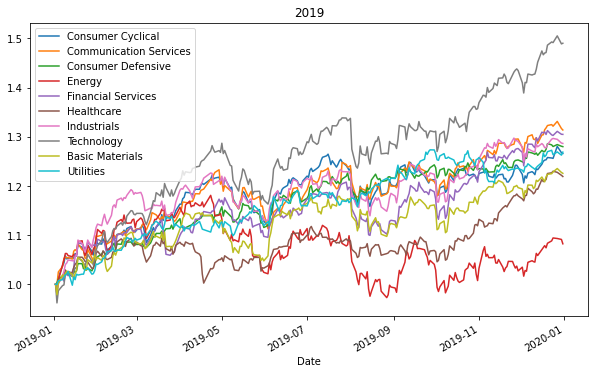

In [20]:
plot_sector_trend(df_s_p['Adj Close'], '2019')

2020: COVID breaks out.  Lots of government support keeps some bits of the economy going strong, in  particular Technology.  Communication Services and Consumer Cyclical benefit from lockdowns forcing people to work from home.  Energy suffers from lack of travel.

Technology                41.0
Consumer Cyclical         33.0
Communication Services    22.0
Basic Materials           20.0
Healthcare                12.0
Consumer Defensive        10.0
Industrials                9.0
Utilities                 -1.0
Financial Services        -4.0
Energy                   -34.0
Name: 2020-12-31 00:00:00, dtype: float64


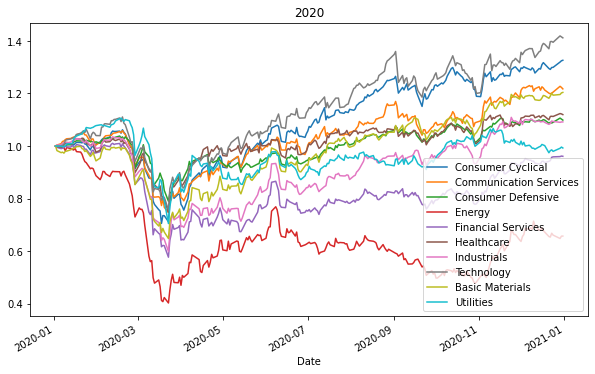

In [21]:
plot_sector_trend(df_s_p['Adj Close'], '2020')

2021: overheating economy?  Lowest annual return is Utilities at 19%, highest is Energy at 53% as travel resumes.

Energy                    53.0
Financial Services        36.0
Technology                36.0
Healthcare                28.0
Basic Materials           27.0
Consumer Cyclical         26.0
Communication Services    23.0
Industrials               22.0
Consumer Defensive        19.0
Utilities                 19.0
Name: 2021-12-31 00:00:00, dtype: float64


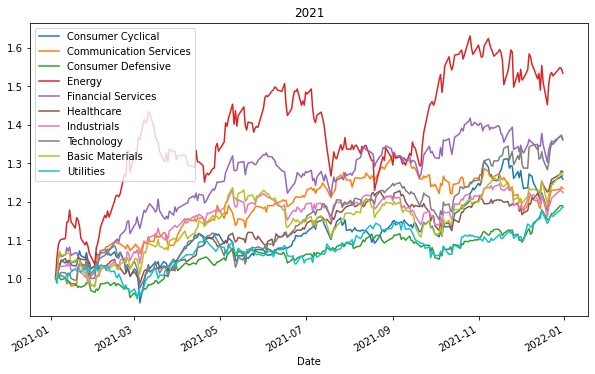

In [22]:
plot_sector_trend(df_s_p['Adj Close'], '2021')

2022 YTD: inflationary worries (i.e. threat of rate increases) damp most sectors.  Russia invasion of Ukraine reduces energy supply so causes Energy and Utilities to rise.

Energy                    38.0
Utilities                 10.0
Consumer Defensive        -0.0
Healthcare                -3.0
Industrials               -7.0
Basic Materials          -12.0
Financial Services       -13.0
Technology               -15.0
Consumer Cyclical        -19.0
Communication Services   -27.0
Name: 2022-08-19 00:00:00, dtype: float64


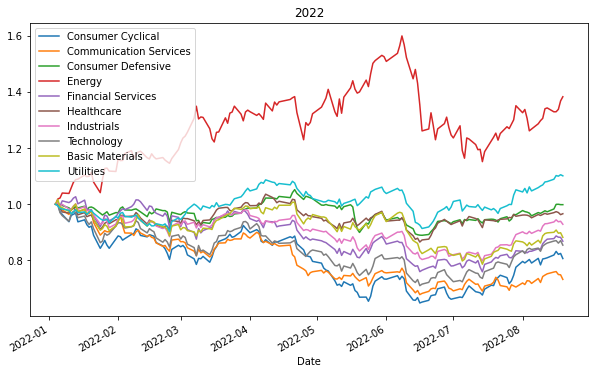

In [23]:
plot_sector_trend(df_s_p['Adj Close'], '2022')

2022 from July: rate rises seem to be controlling inflation in US, less worry of further rate rises so risk sectors such as Technology and Consumer Cyclical start recovering.

Consumer Cyclical         21.0
Technology                18.0
Industrials               13.0
Energy                    12.0
Financial Services        11.0
Utilities                  9.0
Basic Materials            8.0
Consumer Defensive         6.0
Communication Services     6.0
Healthcare                 4.0
Name: 2022-08-19 00:00:00, dtype: float64


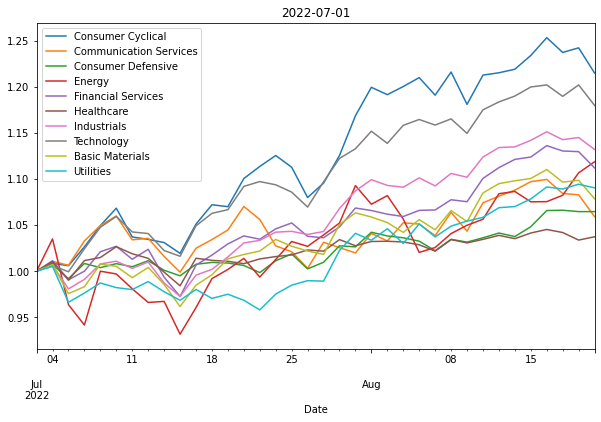

In [24]:
plot_sector_trend(df_s_p['Adj Close'], '2022-07-01')

# Sector correlations
Look at sector return correlations over each time period, and convert to [Stock Correlation Network](https://www.wikiwand.com/en/Stock_correlation_network) (NB: not using the sqrt scaling here).  For the Stock Correlation Network plots the nodes are coloured depending on return over the time period.

In [25]:
def plot_sector_corr(df_s, start_date_str, pos=None):
    start_date = pd.to_datetime(start_date_str)
    end_date = start_date + pd.offsets.DateOffset(years=1)
    df_r = df_s.loc[start_date:end_date, :].pct_change().fillna(0)
    df_r.columns = [sector_names[c.replace('.L', '')] for c in df_r.columns]
    corr = df_r.corr()
    dist = (1 - corr)/2
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
    fig.suptitle(start_date_str)
    sns.heatmap(corr, ax=ax[0])
    
    labels = dict(zip(range(len(dist.index)), dist.index.str.replace(' ', '\n').to_list()))
    G = nx.from_numpy_matrix(dist.values)
    nx.relabel_nodes(G, labels, copy=False)
    # Colour with return over time period
    rets = (1 + df_r).prod().values - 1
    G_s = nx.minimum_spanning_tree(G)
    pos = pos or nx.layout.spring_layout(G_s)
    cmap = 'coolwarm'
    vmin = min(rets)
    vmax=max(rets)
    nx.draw_networkx(
        G_s, ax=ax[1], pos=pos, node_color=rets, cmap=cmap,
        vmin=vmin, vmax=vmax
    )
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = min(rets), vmax=max(rets)))
    sm._A = []
    plt.colorbar(sm, ax=ax[1])
    return G, pos

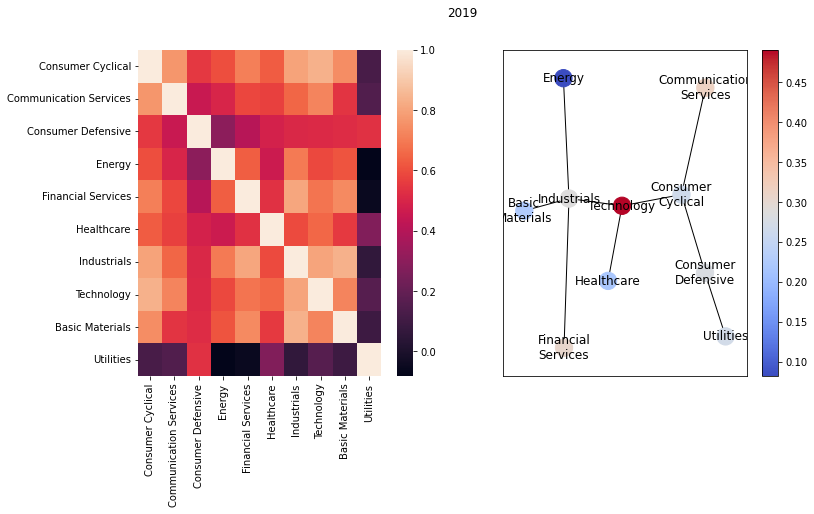

In [26]:
G, pos = plot_sector_corr(df_s_p['Adj Close'], '2019')

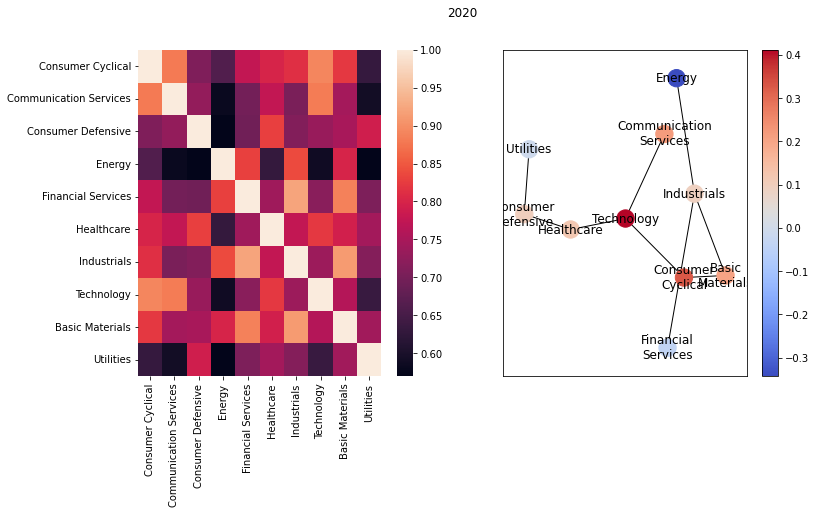

In [27]:
_ = plot_sector_corr(df_s_p['Adj Close'], '2020', )

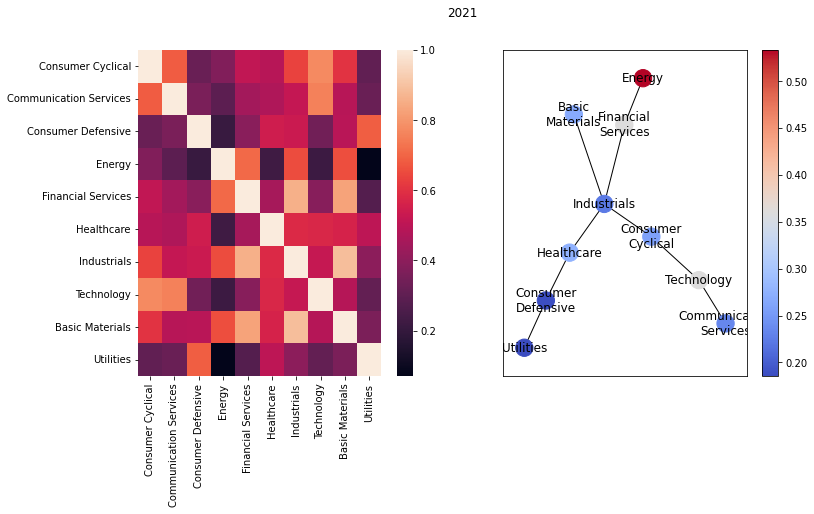

In [28]:
_ = plot_sector_corr(df_s_p['Adj Close'], '2021', )

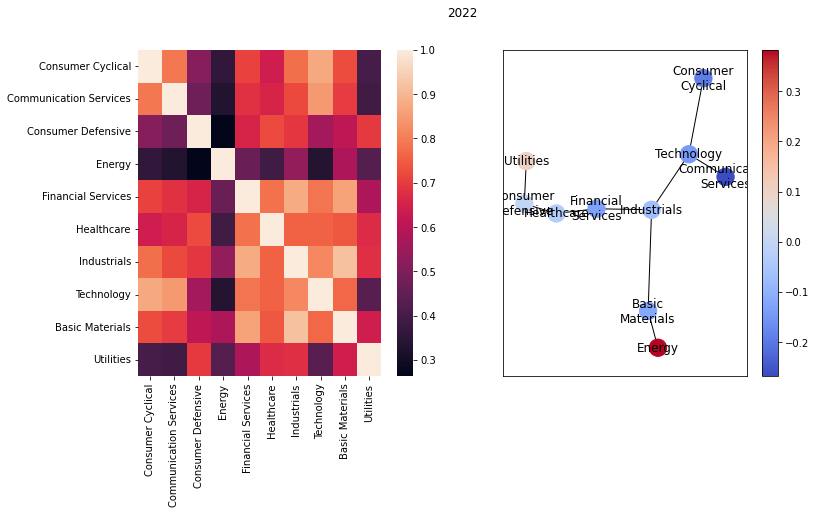

In [29]:
_ = plot_sector_corr(df_s_p['Adj Close'], '2022', )

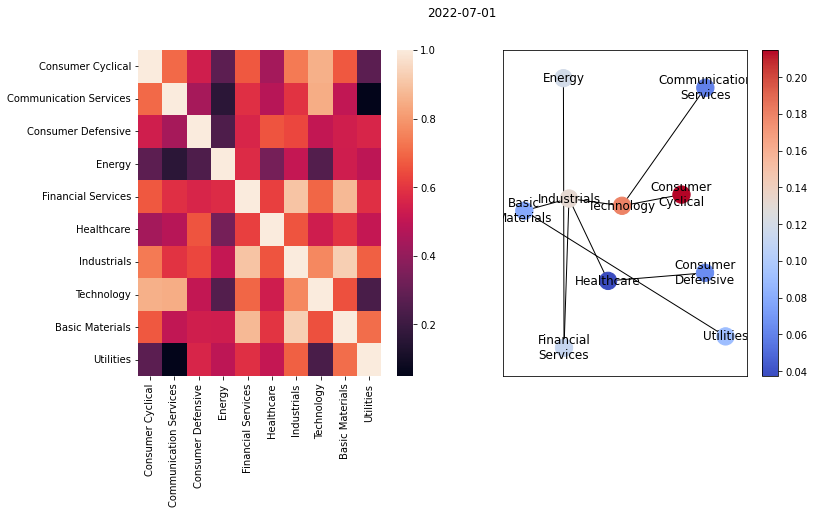

In [30]:
_ = plot_sector_corr(df_s_p['Adj Close'], '2022-07-01', pos)

# FTSE 100
Decomposition of FTSE 100 returns into US sectors.  How stable are the parameters?  How big is the residual?

Want to solve $X = S \beta + \epsilon$, where $X$ is $T \times n_e$ matrix of $T$ timesteps by $n_e$ equity returns, 
$S$ is $T \times n_s$ matrix of sector returns, $\beta$ is $n_s \times n_e$ matrix of factor exposures and $\epsilon$ is $T \times n_e$ residual.

In [31]:
ftse_100 = Index('FTSE 100')
ftse_100.get()

Reading from cache /home/mattmcd/Work/Data/ftse-100.csv


In [32]:
# FTSE 100 prices
df_f_p = yf.download(ftse_100.yfinance_tickers(), start='2019-01-01')

[*********************100%***********************]  100 of 100 completed


Start by looking at a single year to get the logic right, then turn into a rolling window function

In [33]:
df_f_r = df_f_p['Adj Close'].pct_change().loc['2019-01-01':'2020-01-01', :].dropna(
    how='all').dropna(how='any', axis=1)
df_s_r = df_s_p['Adj Close'].pct_change().loc['2019-01-01':'2020-01-01', :]

In [34]:
ftse_tickers = df_f_r.columns
df_f_r.values.shape

(252, 97)

In [35]:
sector_tickers = df_s_r.columns
df_s_r.values.shape

(253, 10)

In [36]:
df_a = pd.concat([df_s_r, df_f_r], axis=1).dropna()
df_a.shape

(252, 107)

In [37]:
X = df_a.loc(axis=1)[ftse_tickers].values
S = df_a.loc(axis=1)[sector_tickers].values

In [38]:
sector_coeff = np.linalg.pinv(S) @ X
sector_coeff.shape

(10, 97)

Result: dataframe of exposures of each stock to the sector indexes

In [39]:
df_c = pd.DataFrame(sector_coeff, columns=ftse_tickers, index=sector_tickers).T
df_c

,IUCD.L,IUCM.L,IUCS.L,IUES.L,IUFS.L,IUHC.L,IUIS.L,IUIT.L,IUMS.L,IUUS.L
AAL.L,0.299022,-0.061530,-0.144168,0.271847,-0.044831,0.134090,0.130329,0.040862,0.542345,0.084068
ABDN.L,-0.130829,-0.008176,-0.354483,-0.047039,0.516630,-0.079920,0.092630,0.317325,0.385012,-0.297698
ABF.L,-0.092120,-0.039915,0.095416,-0.106246,-0.104891,0.143227,0.207169,0.225347,0.290267,0.057839
ADM.L,-0.156173,-0.006254,0.026160,-0.110312,0.214229,0.128962,0.024107,0.272258,0.083807,0.055366
AHT.L,0.176118,0.271381,-0.250493,-0.072598,0.232618,-0.107915,0.449929,0.178687,0.405939,0.036682
...,...,...,...,...,...,...,...,...,...,...
UTG.L,-0.117725,-0.074374,0.016979,-0.130258,0.079372,0.164046,-0.033224,0.282080,0.114414,0.126727
UU.L,-0.224271,0.113488,-0.405733,-0.034440,0.200806,0.153709,-0.359285,0.335925,0.271852,0.576782
VOD.L,-0.448080,0.626633,0.175758,-0.155281,0.237260,-0.071605,-0.276202,0.087479,0.380655,-0.124930
WPP.L,-0.089639,0.148244,-0.079007,0.088846,0.251340,0.080309,-0.063407,0.149689,0.303776,-0.336639


But how good is this decomposition?  First look at some individual scatter plots of predicted return vs actual return

In [40]:
fit_returns = (S @ sector_coeff)
df_fit = pd.DataFrame(fit_returns, columns=ftse_tickers, index=df_a.index)
ftse_residual = X - fit_returns
ftse_residual.shape

(252, 97)

In [43]:
def plot_fit_correlation(ticker):
    x = df_a.loc[:, ticker]
    y = df_fit.loc[:, ticker]
    _ = plt.scatter(x, y, alpha=0.5)
    _ = plt.title(f'{ticker}: r = {np.round(np.corrcoef(x, y)[0,1], 2)}')

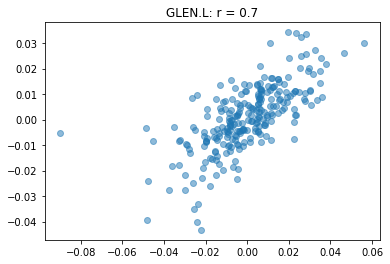

In [44]:
# Reasonable fit
plot_fit_correlation('GLEN.L')

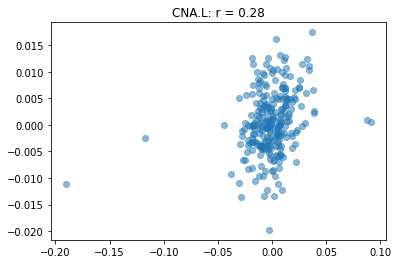

In [45]:
# Not a great fit, although maybe skewed by outliers.  Try lasso regression instead?
plot_fit_correlation('CNA.L')

Quantify how close the fit returns are to the actual returns by looking at the overall correlation

In [46]:
fit_corr = pd.Series(
    (np.corrcoef(df_a.loc[:, t], df_fit.loc[:, t])[0, 1] for t in ftse_tickers), 
    index=ftse_tickers
)
fit_corr.sort_values(ascending=False)

SMT.L     0.804503
AHT.L     0.729311
PRU.L     0.716377
MRO.L     0.711532
GLEN.L    0.700098
            ...   
UTG.L     0.315712
RKT.L     0.308212
IMB.L     0.285509
CNA.L     0.280634
EDV.L     0.151157
Length: 97, dtype: float64

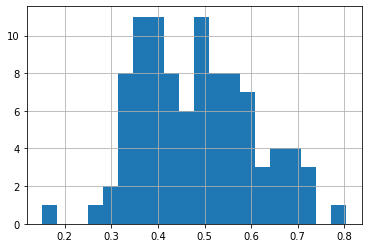

In [47]:
_ = fit_corr.hist(bins=20)

Looks like in general the fit returns capture about half of the variance.  

One thing we could think of doing is going the other way i.e. create a portfolio of stocks that mimics a sector return, or more usefully is negatively correlated with a sector so that we can hedge.  Problem is to find a vector of non-negative portfolio weights summing to 1 that match the index return.

In [48]:
df_c.loc['GLEN.L']

IUCD.L    0.269652
IUCM.L    0.075858
IUCS.L   -0.439926
IUES.L    0.388099
IUFS.L   -0.011009
IUHC.L   -0.160363
IUIS.L    0.414730
IUIT.L   -0.040861
IUMS.L    0.572070
IUUS.L    0.036606
Name: GLEN.L, dtype: float64

In [49]:
import cvxpy as cp

In [50]:
sector_coeff.shape

(10, 97)

In [64]:
# Portfolio weights
target_sector = 'IUFS.L'
target_exposure = -1.
target_ind = df_c.columns == target_sector
x = cp.Variable((sector_coeff.shape[1], 1))
constraints = [0 <= x, x <= 1, cp.sum(x) == 1]
target = np.zeros((sector_coeff.shape[0], 1)).reshape((-1, 1))
target[target_ind]  = target_exposure  # Short Financials
objective = cp.Minimize(cp.norm(sector_coeff @ x - target, 2))
prob = cp.Problem(objective, constraints)
result = prob.solve()
exposure = sector_coeff @ x.value
print('Sector exposures')
print(pd.Series(exposure[:,0], index=df_c.columns, name='sector exposure'))
exposure_to_target = exposure[target_ind][0][0]
print(f'\nExposure to target sector {target_sector}: {exposure_to_target:0.4f} (goal {target_exposure:0.2f})')
pf_ind = np.abs(x.value.reshape(-1)) >= 0.01
print('\nPortfolio Weights')
pf_s = pd.Series(x.value.reshape(-1)[pf_ind], index=df_c.index[pf_ind].to_list())
print(pf_s)

Sector exposures
IUCD.L    0.126454
IUCM.L    0.134495
IUCS.L    0.101749
IUES.L    0.030234
IUFS.L   -0.550850
IUHC.L    0.158121
IUIS.L    0.150429
IUIT.L    0.013406
IUMS.L    0.250544
IUUS.L    0.139657
Name: sector exposure, dtype: float64

Exposure to target sector IUFS.L: -0.5508 (goal -1.00)

Portfolio Weights
AVV.L     0.028999
BP.L      0.084239
DGE.L     0.098967
FRES.L    0.274932
HIK.L     0.130366
PSON.L    0.382497
dtype: float64


In [65]:
# Try with l1 norm  
x = cp.Variable((sector_coeff.shape[1], 1))
constraints = [0 <= x, x <= 1, cp.sum(x) == 1]
target = np.zeros((sector_coeff.shape[0], 1)).reshape((-1, 1))
target[target_ind]  = target_exposure  # Short Financials
objective = cp.Minimize(cp.norm(sector_coeff @ x - target, 1))
prob = cp.Problem(objective, constraints)
result = prob.solve()
exposure = sector_coeff @ x.value
print('Sector exposures')
print(pd.Series(exposure[:,0], index=df_c.columns, name='sector exposure'))
exposure_to_target = exposure[target_ind][0][0]
print(f'\nExposure to target sector {target_sector}: {exposure_to_target:0.4f} (goal {target_exposure:0.2f})')
pf_ind = np.abs(x.value.reshape(-1)) >= 0.01
print('\nPortfolio Weights')
pf_s = pd.Series(x.value.reshape(-1)[pf_ind], index=df_c.index[pf_ind].to_list())
print(pf_s)

Sector exposures
IUCD.L    6.509683e-13
IUCM.L    6.576069e-13
IUCS.L    1.927956e-01
IUES.L    2.381008e-13
IUFS.L   -2.336700e-01
IUHC.L    3.706674e-02
IUIS.L    1.427324e-01
IUIT.L    1.032734e-01
IUMS.L    8.748519e-02
IUUS.L    9.328410e-03
Name: sector exposure, dtype: float64

Exposure to target sector IUFS.L: -0.2337 (goal -1.00)

Portfolio Weights
BP.L      0.150375
EDV.L     0.415593
PSH.L     0.302060
PSON.L    0.131972
dtype: float64
